In [159]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [160]:
#df = pd.read_csv('Uncleaned_employees_final_dataset - Uncleaned_employees_final_dataset.csv')
df = pd.read_csv('Employee.csv')
df

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met_more_than_80,awards_won,avg_training_score
0,74430,HR,region_4,Bachelors,f,other,1,31,3.0,5,0,0,51
1,72255,Sales & Marketing,region_13,Bachelors,m,other,1,31,1.0,4,0,0,47
2,38562,Procurement,region_2,Bachelors,f,other,3,31,2.0,9,0,0,65
3,64486,Finance,region_29,Bachelors,m,sourcing,1,30,4.0,7,0,0,61
4,46232,Procurement,region_7,Bachelors,m,sourcing,1,36,3.0,2,0,0,68
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15417,57239,Sales & Marketing,region_31,Bachelors,m,other,1,42,3.0,10,0,0,53
15418,73858,Sales & Marketing,region_25,Bachelors,m,sourcing,2,28,2.0,5,0,0,45
15419,64573,Technology,region_7,Bachelors,f,referred,2,30,5.0,6,1,0,81
15420,49584,HR,region_7,Bachelors,m,other,1,33,1.0,9,0,0,51


In [161]:
# Step 1: Removing duplicate rows
df.drop_duplicates(inplace=True)
df

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met_more_than_80,awards_won,avg_training_score
0,74430,HR,region_4,Bachelors,f,other,1,31,3.0,5,0,0,51
1,72255,Sales & Marketing,region_13,Bachelors,m,other,1,31,1.0,4,0,0,47
2,38562,Procurement,region_2,Bachelors,f,other,3,31,2.0,9,0,0,65
3,64486,Finance,region_29,Bachelors,m,sourcing,1,30,4.0,7,0,0,61
4,46232,Procurement,region_7,Bachelors,m,sourcing,1,36,3.0,2,0,0,68
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15417,57239,Sales & Marketing,region_31,Bachelors,m,other,1,42,3.0,10,0,0,53
15418,73858,Sales & Marketing,region_25,Bachelors,m,sourcing,2,28,2.0,5,0,0,45
15419,64573,Technology,region_7,Bachelors,f,referred,2,30,5.0,6,1,0,81
15420,49584,HR,region_7,Bachelors,m,other,1,33,1.0,9,0,0,51


In [162]:
# Step 2: Removing rows for which numeric columns are having irrelevant data type values
df = df[pd.to_numeric(df['no_of_trainings'], errors='coerce').notnull()]
df = df[pd.to_numeric(df['previous_year_rating'], errors='coerce').notnull()]
df = df[pd.to_numeric(df['length_of_service'], errors='coerce').notnull()]
df = df[pd.to_numeric(df['KPIs_met_more_than_80'], errors='coerce').notnull()]
df = df[pd.to_numeric(df['awards_won'], errors='coerce').notnull()]
df = df[pd.to_numeric(df['avg_training_score'], errors='coerce').notnull()]
df

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met_more_than_80,awards_won,avg_training_score
0,74430,HR,region_4,Bachelors,f,other,1,31,3.0,5,0,0,51
1,72255,Sales & Marketing,region_13,Bachelors,m,other,1,31,1.0,4,0,0,47
2,38562,Procurement,region_2,Bachelors,f,other,3,31,2.0,9,0,0,65
3,64486,Finance,region_29,Bachelors,m,sourcing,1,30,4.0,7,0,0,61
4,46232,Procurement,region_7,Bachelors,m,sourcing,1,36,3.0,2,0,0,68
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15417,57239,Sales & Marketing,region_31,Bachelors,m,other,1,42,3.0,10,0,0,53
15418,73858,Sales & Marketing,region_25,Bachelors,m,sourcing,2,28,2.0,5,0,0,45
15419,64573,Technology,region_7,Bachelors,f,referred,2,30,5.0,6,1,0,81
15420,49584,HR,region_7,Bachelors,m,other,1,33,1.0,9,0,0,51


In [163]:
df.dropna(inplace=True)
df

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met_more_than_80,awards_won,avg_training_score
0,74430,HR,region_4,Bachelors,f,other,1,31,3.0,5,0,0,51
1,72255,Sales & Marketing,region_13,Bachelors,m,other,1,31,1.0,4,0,0,47
2,38562,Procurement,region_2,Bachelors,f,other,3,31,2.0,9,0,0,65
3,64486,Finance,region_29,Bachelors,m,sourcing,1,30,4.0,7,0,0,61
4,46232,Procurement,region_7,Bachelors,m,sourcing,1,36,3.0,2,0,0,68
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15417,57239,Sales & Marketing,region_31,Bachelors,m,other,1,42,3.0,10,0,0,53
15418,73858,Sales & Marketing,region_25,Bachelors,m,sourcing,2,28,2.0,5,0,0,45
15419,64573,Technology,region_7,Bachelors,f,referred,2,30,5.0,6,1,0,81
15420,49584,HR,region_7,Bachelors,m,other,1,33,1.0,9,0,0,51


In [164]:
# Validation check for appropriate age range
df = df[df['age'] >= 18]
df = df[df['age'] <= 74]
df

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met_more_than_80,awards_won,avg_training_score
0,74430,HR,region_4,Bachelors,f,other,1,31,3.0,5,0,0,51
1,72255,Sales & Marketing,region_13,Bachelors,m,other,1,31,1.0,4,0,0,47
2,38562,Procurement,region_2,Bachelors,f,other,3,31,2.0,9,0,0,65
3,64486,Finance,region_29,Bachelors,m,sourcing,1,30,4.0,7,0,0,61
4,46232,Procurement,region_7,Bachelors,m,sourcing,1,36,3.0,2,0,0,68
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15417,57239,Sales & Marketing,region_31,Bachelors,m,other,1,42,3.0,10,0,0,53
15418,73858,Sales & Marketing,region_25,Bachelors,m,sourcing,2,28,2.0,5,0,0,45
15419,64573,Technology,region_7,Bachelors,f,referred,2,30,5.0,6,1,0,81
15420,49584,HR,region_7,Bachelors,m,other,1,33,1.0,9,0,0,51


In [165]:
#df.to_csv('Employee.csv', index=False, encoding='utf-8')

In [166]:
#df = pd.read_csv('Employee.csv')
#df

In [167]:
# Average age of employees in each department and gender group
avg_age = df.groupby(['department', 'gender'])['age'].mean().round(2)

print(avg_age)

department         gender
Analytics          f         29.88
                   m         33.54
Finance            f         33.33
                   m         33.15
HR                 f         35.57
                   m         34.98
Legal              f         33.72
                   m         34.69
Operations         f         36.37
                   m         36.88
Procurement        f         36.86
                   m         36.73
R&D                f         31.69
                   m         33.40
Sales & Marketing  f         34.90
                   m         35.90
Technology         f         35.76
                   m         35.87
Name: age, dtype: float64


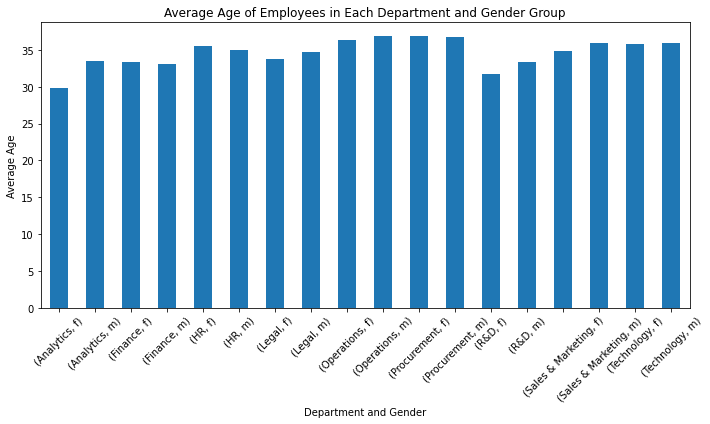

In [168]:
# Calculate average age
avg_age = df.groupby(['department', 'gender'])['age'].mean().round(2)

# Create a bar plot
fig, ax = plt.subplots(figsize=(10, 6))
avg_age.plot(kind='bar', ax=ax)

# Set labels and title
ax.set_xlabel('Department and Gender')
ax.set_ylabel('Average Age')
ax.set_title('Average Age of Employees in Each Department and Gender Group')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

In [169]:
#Top 3 departments with the highest average training scores
department_scores = df.groupby('department')['avg_training_score'].mean().reset_index()

#Round to two decimal places
department_scores['avg_training_score'] = department_scores['avg_training_score'].round(2)  
sorted_departments = department_scores.sort_values('avg_training_score', ascending=False)
top_departments = sorted_departments.head(3)

print(top_departments)

   department  avg_training_score
0   Analytics               84.59
6         R&D               84.42
8  Technology               79.81


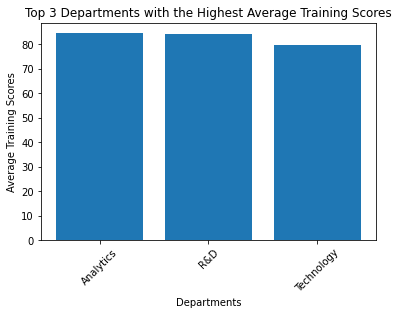

In [170]:
# Data for the top 3 departments with the highest average training scores
departments = top_departments['department']
scores = top_departments['avg_training_score']

# Create the bar plot
plt.bar(departments, scores)

# Customize the plot
plt.xlabel('Departments')
plt.ylabel('Average Training Scores')
plt.title('Top 3 Departments with the Highest Average Training Scores')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()

In [171]:
#Find the percentage of employees who have won awards in each region
region_awards_percentage = df.groupby('region')['awards_won'].mean() * 100
region_awards_percentage = region_awards_percentage.round(2)

print(region_awards_percentage)

region
region_1     0.00
region_10    5.00
region_11    1.55
region_12    2.24
region_13    2.24
region_14    1.63
region_15    3.01
region_16    1.77
region_17    5.67
region_18    0.00
region_19    0.67
region_2     2.19
region_20    2.70
region_21    0.93
region_22    2.05
region_23    2.26
region_24    0.66
region_25    2.20
region_26    1.53
region_27    4.20
region_28    1.57
region_29    2.85
region_3     5.94
region_30    1.10
region_31    1.91
region_32    2.10
region_33    2.33
region_34    2.65
region_4     3.31
region_5     2.25
region_6     4.21
region_7     2.86
region_8     3.16
region_9     5.05
Name: awards_won, dtype: float64


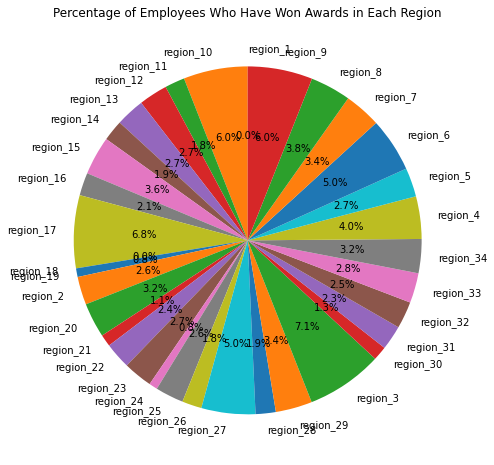

In [172]:
# Data for the percentage of employees who have won awards in each region
regions = region_awards_percentage.index
percentage = region_awards_percentage.values

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(percentage, labels=regions, autopct='%1.1f%%', startangle=90)

# Customize the plot
plt.title('Percentage of Employees Who Have Won Awards in Each Region')

plt.show()

In [173]:
# Show the number of employees who have met more than 80% of KPIs for each recruitment channel and education level
filtered_data = df[df['KPIs_met_more_than_80'] > 0.8]
result = filtered_data.groupby(['recruitment_channel', 'education']).size().reset_index(name='count')

print(result)

  recruitment_channel        education  count
0               other        Bachelors   2044
1               other  Below Secondary     38
2               other  Masters & above   1003
3            referred        Bachelors    125
4            referred  Below Secondary      2
5            referred  Masters & above     33
6            sourcing        Bachelors   1574
7            sourcing  Below Secondary     34
8            sourcing  Masters & above    723


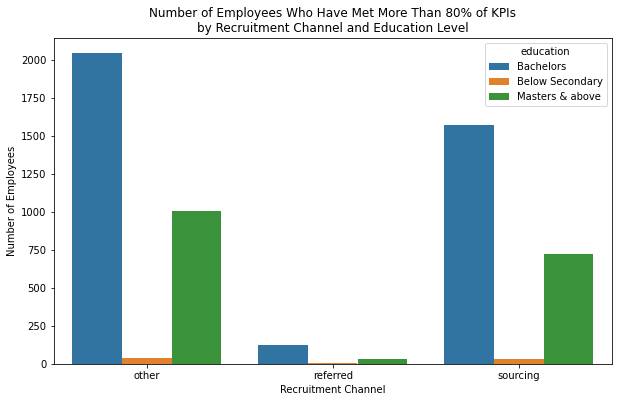

In [174]:
# Create the stacked bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='recruitment_channel', y='count', hue='education', data=result)

# Customize the plot
plt.xlabel('Recruitment Channel')
plt.ylabel('Number of Employees')
plt.title('Number of Employees Who Have Met More Than 80% of KPIs\nby Recruitment Channel and Education Level')

# Display the plot
plt.show()

In [175]:
# Filter employees with previous year ratings greater than or equal to 4
filtered_data = df[df['previous_year_rating'] >= 4]

# Group the filtered dataframe by department and calculate the average length of service
average_length_of_service = filtered_data.groupby('department')['length_of_service'].mean()

# Round the average length of service to two decimal places
average_length_of_service = average_length_of_service.round(2)

print(average_length_of_service)

department
Analytics            5.53
Finance              5.70
HR                   6.07
Legal                4.79
Operations           6.83
Procurement          6.63
R&D                  4.86
Sales & Marketing    6.33
Technology           6.31
Name: length_of_service, dtype: float64


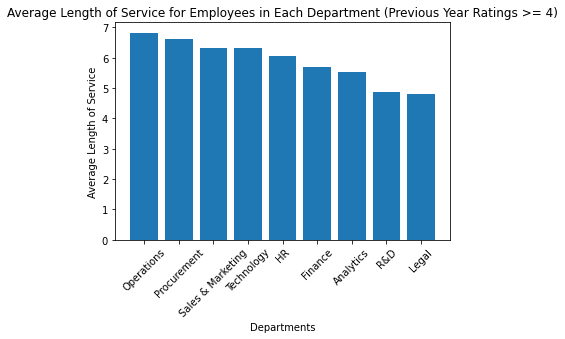

In [176]:
# Filter employees with previous year ratings greater than or equal to 4
filtered_data = df[df['previous_year_rating'] >= 4]

# Group the filtered dataframe by department and calculate the average length of service
average_length_of_service = filtered_data.groupby('department')['length_of_service'].mean()

# Round the average length of service to two decimal places
average_length_of_service = average_length_of_service.round(2)

# Sort the departments in descending order by average length of service
sorted_departments = average_length_of_service.sort_values(ascending=False)

# Create the bar plot
plt.bar(sorted_departments.index, sorted_departments.values)

# Customize the plot
plt.xlabel('Departments')
plt.ylabel('Average Length of Service')
plt.title('Average Length of Service for Employees in Each Department (Previous Year Ratings >= 4)')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()

In [177]:
# Calculate the average previous year rating for each region
region_ratings = df.groupby('region')['previous_year_rating'].mean().reset_index()

# Sort the regions based on average rating in descending order
region_ratings_sorted = region_ratings.sort_values(by='previous_year_rating', ascending=False)

# Get the top 5 regions
top_5_regions = region_ratings_sorted.head(5)

print(top_5_regions)

       region  previous_year_rating
17  region_25              3.581498
28   region_4              3.525735
32   region_8              3.500000
20  region_28              3.485640
15  region_23              3.468927


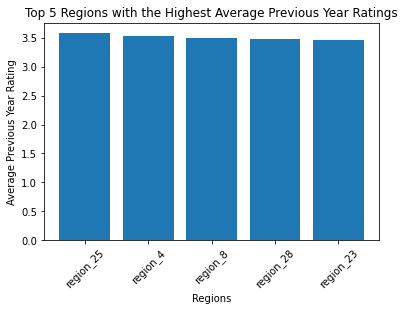

In [178]:
# Create the bar plot
plt.bar(top_5_regions['region'], top_5_regions['previous_year_rating'])

# Customize the plot
plt.xlabel('Regions')
plt.ylabel('Average Previous Year Rating')
plt.title('Top 5 Regions with the Highest Average Previous Year Ratings')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()

In [179]:
# Departments with More Than 100 Employees Having a Length of Service > 5 Years
# Filter the data based on the conditions
filtered_data = df[(df['length_of_service'] > 5) & (df.groupby('department')['employee_id'].transform('count') > 100)]

# Group the filtered data by department and count the number of employees
department_counts = filtered_data.groupby('department')['employee_id'].count()

print(department_counts)

department
Analytics             591
Finance               300
HR                    332
Legal                  98
Operations           1720
Procurement          1023
R&D                   115
Sales & Marketing    2204
Technology            896
Name: employee_id, dtype: int64


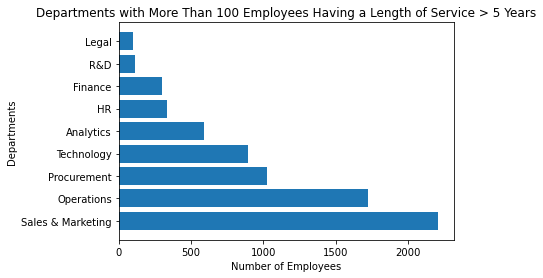

In [180]:
# Filter the data based on the conditions
filtered_data = df[(df['length_of_service'] > 5) & (df.groupby('department')['employee_id'].transform('count') > 100)]

# Group the filtered data by department and count the number of employees
department_counts = filtered_data.groupby('department')['employee_id'].count()

# Sort the departments by the number of employees in descending order
sorted_departments = department_counts.sort_values(ascending=False)

# Create the horizontal bar plot
plt.barh(sorted_departments.index, sorted_departments.values)

# Customize the plot
plt.xlabel('Number of Employees')
plt.ylabel('Departments')
plt.title('Departments with More Than 100 Employees Having a Length of Service > 5 Years')

# Display the plot
plt.show()

In [181]:
# Show the average length of service for employees who have attended more than 3 training, grouped by department and gender
# Filter the data for employees who have attended more than 3 trainings
filtered_data = df[df['no_of_trainings'] > 3]

# Calculate the average length of service grouped by department and gender
avg_length_of_service = filtered_data.groupby(['department', 'gender'])['length_of_service'].mean().reset_index()

# Round the average length of service to two decimal places
avg_length_of_service['length_of_service'] = avg_length_of_service['length_of_service'].round(2)

print(avg_length_of_service)

           department gender  length_of_service
0           Analytics      m               4.80
1             Finance      m               3.50
2          Operations      f               7.50
3          Operations      m               4.25
4         Procurement      f               4.80
5         Procurement      m               5.92
6                 R&D      m               3.71
7   Sales & Marketing      f               5.00
8   Sales & Marketing      m               5.44
9          Technology      f               6.50
10         Technology      m               7.85


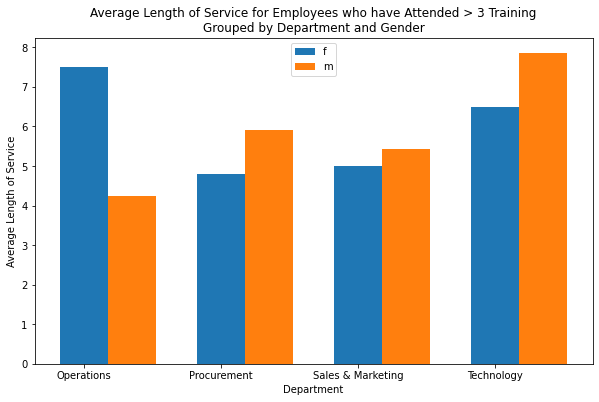

In [184]:
import numpy as np
import matplotlib.pyplot as plt

# Filter the data for employees who have attended more than 3 trainings
filtered_data = df[df['no_of_trainings'] > 3]

# Calculate the average length of service grouped by department and gender
avg_length_of_service = filtered_data.groupby(['department', 'gender'])['length_of_service'].mean().reset_index()

# Round the average length of service to two decimal places
avg_length_of_service['length_of_service'] = avg_length_of_service['length_of_service'].round(2)

# Filter out departments or genders with insufficient data points
filtered_avg_length_of_service = avg_length_of_service.groupby('department').filter(lambda x: len(x) == len(avg_length_of_service['gender'].unique()))

# Get the unique departments and genders after filtering
departments = filtered_avg_length_of_service['department'].unique()
genders = filtered_avg_length_of_service['gender'].unique()

# Set the width of each bar
bar_width = 0.35

# Set the x-axis positions for each group
x = np.arange(len(departments))

# Create the grouped bar plot
fig, ax = plt.subplots(figsize=(10, 6))
for i, gender in enumerate(genders):
    avg_service = filtered_avg_length_of_service[filtered_avg_length_of_service['gender'] == gender]['length_of_service']
    ax.bar(x + i * bar_width, avg_service, bar_width, label=gender)

# Customize the plot
ax.set_xlabel('Department')
ax.set_ylabel('Average Length of Service')
ax.set_title('Average Length of Service for Employees who have Attended > 3 Training\nGrouped by Department and Gender')
ax.set_xticks(x)
ax.set_xticklabels(departments)
ax.legend()

# Display the plot
plt.show()

In [112]:
# Find the percentage of female employees who have won awards, per department. 
# Also show the number of female employees who won awards and total female employees. 
# Filter the female employees
female_employees = df[df['gender'] == 'F']

# Group by department and calculate the total number of female employees and the number of female employees who won awards
department_stats = female_employees.groupby('department').agg(
    total_female=('employee_id', 'count'),
    awards_won_female=('awards_won', 'sum')
)

# Calculate the percentage of female employees who won awards
department_stats['percentage_awards_won_female'] = (department_stats['awards_won_female'] / department_stats['total_female']) * 100

# Round the percentage to two decimal places
department_stats['percentage_awards_won_female'] = department_stats['percentage_awards_won_female'].round(2)

# Display the results
print(department_stats)

Empty DataFrame
Columns: [total_female, awards_won_female, percentage_awards_won_female]
Index: []


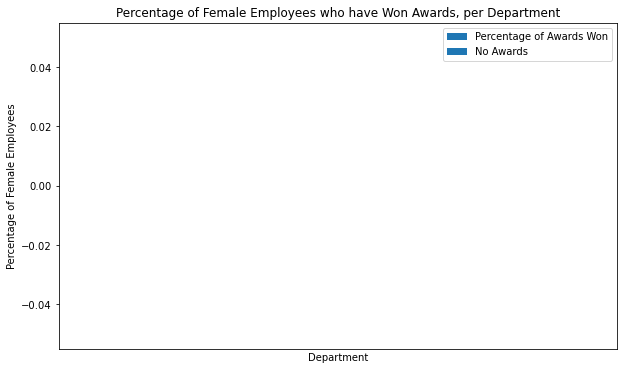

In [185]:
import numpy as np
import matplotlib.pyplot as plt

# Filter the female employees
female_employees = df[df['gender'] == 'F']

# Group by department and calculate the total number of female employees and the number of female employees who won awards
department_stats = female_employees.groupby('department').agg(
    total_female=('employee_id', 'count'),
    awards_won_female=('awards_won', 'sum')
)

# Calculate the percentage of female employees who won awards
department_stats['percentage_awards_won_female'] = (department_stats['awards_won_female'] / department_stats['total_female']) * 100

# Round the percentage to two decimal places
department_stats['percentage_awards_won_female'] = department_stats['percentage_awards_won_female'].round(2)

# Create the figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Set the x-axis positions for each department
x = np.arange(len(department_stats.index))

# Plot the stacked bar chart
ax.bar(x, department_stats['percentage_awards_won_female'], label='Percentage of Awards Won')
ax.bar(x, department_stats['total_female'] - department_stats['awards_won_female'], bottom=department_stats['awards_won_female'], label='No Awards')

# Customize the plot
ax.set_xlabel('Department')
ax.set_ylabel('Percentage of Female Employees')
ax.set_title('Percentage of Female Employees who have Won Awards, per Department')
ax.set_xticks(x)
ax.set_xticklabels(department_stats.index)
ax.legend()

# Add labels for the number of female employees who won awards and the total number of female employees
for i, p in enumerate(ax.patches):
    if i % 2 == 0:
        ax.annotate(f"{department_stats['awards_won_female'][i // 2]} / {department_stats['total_female'][i // 2]}", (p.get_x() + p.get_width() / 2., p.get_y() + p.get_height()), ha='center', va='center')

# Display the plot
plt.show()

In [113]:
# Calculate the percentage of employees per department who have a length of service between 5 and 10 years. 
# Filter the employees with length of service between 5 and 10 years
filtered_data = df[(df['length_of_service'] >= 5) & (df['length_of_service'] <= 10)]

# Group the filtered data by department and calculate the percentage of employees
percentage_per_department = filtered_data.groupby('department').size() / df.groupby('department').size() * 100

# Round the percentage up to two decimal places
percentage_per_department = percentage_per_department.round(2)

print(percentage_per_department)

department
Analytics            47.63
Finance              47.35
HR                   45.66
Legal                37.98
Operations           49.00
Procurement          48.19
R&D                  46.49
Sales & Marketing    48.45
Technology           45.92
dtype: float64


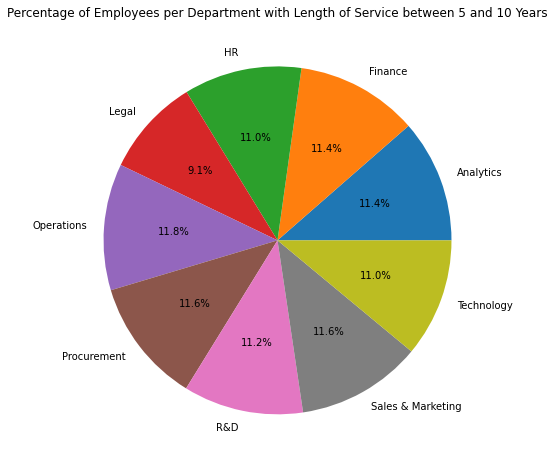

In [187]:
# Filter the employees with length of service between 5 and 10 years
filtered_data = df[(df['length_of_service'] >= 5) & (df['length_of_service'] <= 10)]

# Group the filtered data by department and calculate the percentage of employees
percentage_per_department = filtered_data.groupby('department').size() / df.groupby('department').size() * 100

# Round the percentage up to two decimal places
percentage_per_department = percentage_per_department.round(2)

# Create the pie chart
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(percentage_per_department, labels=percentage_per_department.index, autopct='%1.1f%%')

# Customize the plot
ax.set_title('Percentage of Employees per Department with Length of Service between 5 and 10 Years')

# Display the plot
plt.show()

In [114]:
# Find the top 3 regions with the highest number of employees who have met more than 80% of their KPIs 
# and received at least one award, grouped by department and region.
# Filter employees who have met more than 80% of their KPIs and received at least one award
filtered_data = df[(df['KPIs_met_more_than_80'] > 0) & (df['awards_won'] > 0)]

# Group employees by department and region and count the number of employees in each group
grouped_data = filtered_data.groupby(['department', 'region']).size().reset_index(name='employee_count')

# Sort the groups by the number of employees in descending order
sorted_data = grouped_data.sort_values('employee_count', ascending=False)

# Get the top 3 regions with the highest number of employees
top_3_regions = sorted_data.head(3)

print(top_3_regions)

           department    region  employee_count
80  Sales & Marketing  region_2              19
59        Procurement  region_2              13
93  Sales & Marketing  region_7              10


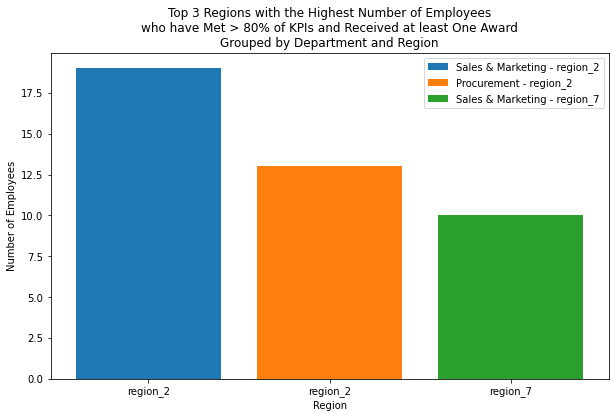

In [188]:
# Filter employees who have met more than 80% of their KPIs and received at least one award
filtered_data = df[(df['KPIs_met_more_than_80'] > 0) & (df['awards_won'] > 0)]

# Group employees by department and region and count the number of employees in each group
grouped_data = filtered_data.groupby(['department', 'region']).size().reset_index(name='employee_count')

# Sort the groups by the number of employees in descending order
sorted_data = grouped_data.sort_values('employee_count', ascending=False)

# Get the top 3 regions with the highest number of employees
top_3_regions = sorted_data.head(3)

# Create the grouped bar plot
fig, ax = plt.subplots(figsize=(10, 6))

# Set the x-axis positions for each department
x = np.arange(len(top_3_regions))

# Plot the bars for each department and region combination
for i, (_, row) in enumerate(top_3_regions.iterrows()):
    department = row['department']
    region = row['region']
    employee_count = row['employee_count']
    ax.bar(x[i], employee_count, label=f'{department} - {region}')

# Customize the plot
ax.set_xlabel('Region')
ax.set_ylabel('Number of Employees')
ax.set_title('Top 3 Regions with the Highest Number of Employees\nwho have Met > 80% of KPIs and Received at least One Award\nGrouped by Department and Region')
ax.set_xticks(x)
ax.set_xticklabels(top_3_regions['region'])
ax.legend()

# Display the plot
plt.show()

In [115]:
# Calculate the average length of service for employees per education level and gender, considering only those employees 
# who have completed more than 2 trainings and have an average training score greater than 75
# Filter the data based on the given conditions
filtered_df = df[(df['no_of_trainings'] > 2) & (df['avg_training_score'] > 75)]

# Group the filtered data by education level and gender, and calculate the average length of service
avg_length_of_service = filtered_df.groupby(['education', 'gender'])['length_of_service'].mean()

# Round the average length of service to two decimal places
avg_length_of_service = avg_length_of_service.round(2)

print(avg_length_of_service)

education        gender
Bachelors        f         5.71
                 m         4.53
Below Secondary  m         1.67
Masters & above  f         6.00
                 m         6.70
Name: length_of_service, dtype: float64


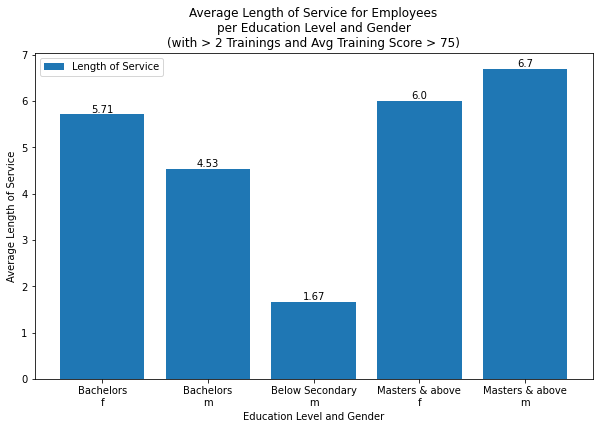

In [190]:
import numpy as np
import matplotlib.pyplot as plt

# Filter the data based on the given conditions
filtered_df = df[(df['no_of_trainings'] > 2) & (df['avg_training_score'] > 75)]

# Group the filtered data by education level and gender, and calculate the average length of service
avg_length_of_service = filtered_df.groupby(['education', 'gender'])['length_of_service'].mean()

# Round the average length of service to two decimal places
avg_length_of_service = avg_length_of_service.round(2)

# Create the grouped bar plot
fig, ax = plt.subplots(figsize=(10, 6))

# Set the x-axis positions for each education level
x = np.arange(len(avg_length_of_service))

# Plot the bars for each education level and gender combination
bars = ax.bar(x, avg_length_of_service.values)

# Add labels to the bars
for i, bar in enumerate(bars):
    education_level = avg_length_of_service.index[i][0]
    gender = avg_length_of_service.index[i][1]
    length_of_service = avg_length_of_service.values[i]
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(length_of_service),
            ha='center', va='bottom')

# Customize the plot
ax.set_xlabel('Education Level and Gender')
ax.set_ylabel('Average Length of Service')
ax.set_title('Average Length of Service for Employees\nper Education Level and Gender\n(with > 2 Trainings and Avg Training Score > 75)')
ax.set_xticks(x)
ax.set_xticklabels([f'{edu}\n{gen}' for edu, gen in avg_length_of_service.index])
ax.legend(['Length of Service'])

# Display the plot
plt.show()


In [116]:
# For each department and recruitment channel, find the total number of employees who have met more than 80% of their KPIs, 
# have a previous_year_rating of 5, and have a length of service greater than 10 years.
# Filter the data based on the given criteria
filtered_data = df[(df['previous_year_rating'] == 5) &
                   (df['length_of_service'] > 10) &
                   (df['KPIs_met_more_than_80'] > 0.8)]

# Group the filtered data by department and recruitment channel and count the number of employees in each group
result = filtered_data.groupby(['department', 'recruitment_channel']).size().reset_index(name='total_employees')

print(result)

           department recruitment_channel  total_employees
0           Analytics               other               17
1           Analytics            sourcing                3
2             Finance               other                3
3             Finance            sourcing                4
4                  HR               other                4
5                  HR            referred                1
6                  HR            sourcing                3
7               Legal               other                2
8               Legal            sourcing                2
9          Operations               other               55
10         Operations            sourcing               39
11        Procurement               other               24
12        Procurement            sourcing               14
13                R&D               other                1
14                R&D            sourcing                1
15  Sales & Marketing               other               

ValueError: Unknown format code 'd' for object of type 'float'

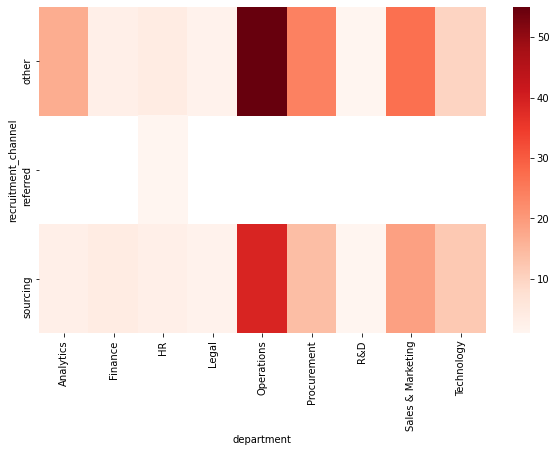

In [197]:
# Filter the data based on the given criteria
filtered_data = df[(df['previous_year_rating'] == 5) &
                   (df['length_of_service'] > 10) &
                   (df['KPIs_met_more_than_80'] > 0.8)]

# Group the filtered data by department and recruitment channel and count the number of employees in each group
result = filtered_data.groupby(['department', 'recruitment_channel']).size().reset_index(name='total_employees')

# Convert 'total_employees' column to integer
result['total_employees'] = result['total_employees'].astype(int)

# Pivot the data to create a matrix-like representation for the heatmap
heatmap_data = result.pivot(index='recruitment_channel', columns='department', values='total_employees')

# Create the heatmap
fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='Reds', cbar=True, ax=ax)

# Customize the plot
ax.set_xlabel('Department')
ax.set_ylabel('Recruitment Channel')
ax.set_title('Total Number of Employees\n(> 80% KPIs, Previous Year Rating 5, Length of Service > 10 Years)')
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()

In [117]:
# Calculate the percentage of employees in each department who have received awards, have a previous_year_rating of 4 or 5, 
# and an average training score above 70, grouped by department and gender 
# Filter the data based on the given conditions
filtered_df = df[(df['awards_won'] == 1) & (df['previous_year_rating'].isin([4, 5])) & (df['avg_training_score'] > 70)]

# Group the filtered data by department and gender and calculate the percentage
result_df = filtered_df.groupby(['department', 'gender']).size().reset_index(name='count')
result_df['percentage'] = (result_df['count'] / filtered_df.shape[0]) * 100

# Round the percentage to two decimal places
result_df['percentage'] = result_df['percentage'].round(2)

print(result_df)

           department gender  count  percentage
0           Analytics      f      2        2.15
1           Analytics      m     15       16.13
2             Finance      f      2        2.15
3             Finance      m      1        1.08
4                  HR      f      1        1.08
5          Operations      f      7        7.53
6          Operations      m      7        7.53
7         Procurement      f      6        6.45
8         Procurement      m      8        8.60
9                 R&D      m      4        4.30
10  Sales & Marketing      f      2        2.15
11  Sales & Marketing      m      7        7.53
12         Technology      f     11       11.83
13         Technology      m     20       21.51


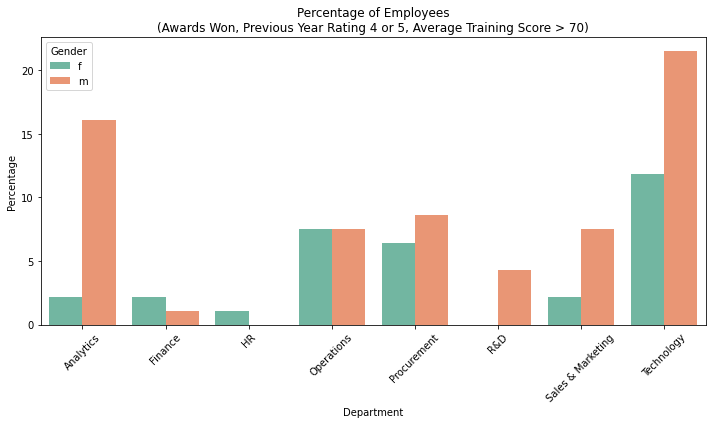

In [198]:
# Filter the data based on the given conditions
filtered_df = df[(df['awards_won'] == 1) & (df['previous_year_rating'].isin([4, 5])) & (df['avg_training_score'] > 70)]

# Group the filtered data by department and gender and calculate the percentage
result_df = filtered_df.groupby(['department', 'gender']).size().reset_index(name='count')
result_df['percentage'] = (result_df['count'] / filtered_df.shape[0]) * 100

# Round the percentage to two decimal places
result_df['percentage'] = result_df['percentage'].round(2)

# Create the grouped bar plot
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(data=result_df, x='department', y='percentage', hue='gender', palette='Set2', ax=ax)

# Customize the plot
ax.set_xlabel('Department')
ax.set_ylabel('Percentage')
ax.set_title('Percentage of Employees\n(Awards Won, Previous Year Rating 4 or 5, Average Training Score > 70)')
plt.xticks(rotation=45)
ax.legend(title='Gender')

# Display the plot
plt.tight_layout()
plt.show()


In [118]:
# List the top 5 recruitment channels with the highest average length of service for employees who have met more than 80% 
# of their KPIs, have a previous_year_rating of 5, and an age between 25 and 45 years, grouped by department and recruitment
# channel
# Filter the data based on the given conditions
filtered_data = df[
    (df['KPIs_met_more_than_80'] == 1) &
    (df['previous_year_rating'] == 5) &
    (df['age'].between(25, 45))
]

# Calculate the average length of service for each department and recruitment channel
grouped_data = filtered_data.groupby(['department', 'recruitment_channel'])['length_of_service'].mean().reset_index()

# Sort the data by average length of service in descending order
sorted_data = grouped_data.sort_values(by='length_of_service', ascending=False)

# Retrieve the top 5 recruitment channels with the highest average length of service
top_5_channels = sorted_data.head(5)

# Round the average length of service up to two decimal places
top_5_channels['length_of_service'] = top_5_channels['length_of_service'].round(2)

print(top_5_channels)

           department recruitment_channel  length_of_service
13         Operations            referred               6.20
12         Operations               other               6.08
14         Operations            sourcing               5.93
21  Sales & Marketing               other               5.77
17        Procurement            sourcing               5.65


<ipython-input-118-8b51efae0e78>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_5_channels['length_of_service'] = top_5_channels['length_of_service'].round(2)


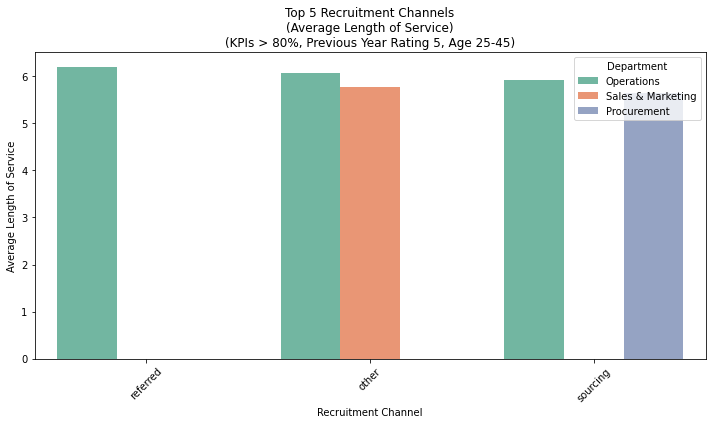

In [199]:
# Create the grouped bar plot
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(data=top_5_channels, x='recruitment_channel', y='length_of_service', hue='department', palette='Set2', ax=ax)

# Customize the plot
ax.set_xlabel('Recruitment Channel')
ax.set_ylabel('Average Length of Service')
ax.set_title('Top 5 Recruitment Channels\n(Average Length of Service)\n(KPIs > 80%, Previous Year Rating 5, Age 25-45)')
plt.xticks(rotation=45)
ax.legend(title='Department')

# Display the plot
plt.tight_layout()
plt.show()